# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [ ]:
#load the required packages
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_openml

In [ ]:
#fix your ID ("numero di matricola") and the seed for random generator
ID = 2019157
np.random.seed(ID)

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [ ]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
mnist = fetch_openml('mnist_784', version=1)
# rescale the data
X, y = mnist.data / 255., mnist.target

Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [ ]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
repeat=1
while repeat:
    permutation = np.random.permutation(X.shape[0])

    X = X[permutation]
    y = y[permutation]

    m_training = 500

    X_train, X_test = X[:m_training], X[m_training:]
    y_train, y_test = y[:m_training], y[m_training:]

    print("Labels and frequencies in training dataset: ")
    label,counter=np.unique(y_train, return_counts = True)
    print("label: ",label,"\ncounter: ",counter)
    repeat=np.count_nonzero(counter<10)

Labels and frequencies in training dataset: 
label:  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9'] 
counter:  [57 57 40 46 52 46 50 50 50 52]


We now provide a function to print an image in a dataset, the corresponding true label, and the index of the image in the dataset.

In [ ]:
#function for plotting a digit and printing the corresponding labe
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %s" % labels[index])
    return

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


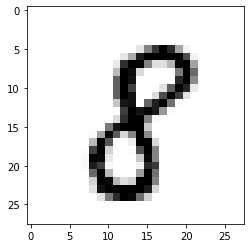

LABEL: 8
INPUT:


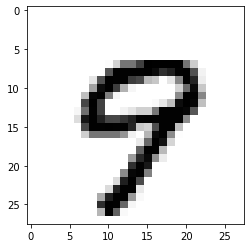

LABEL: 9


In [ ]:
#let's try the plotting function
plot_digit(X_train,y_train,100)
plot_digit(X_test,y_test,40000)

## Exercize 1
Run SVM with cross validation to pick a kernel and values of parameters. Use a 5-fold cross-validation to pick the best kernel and choice of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Print the best parameters used as well as the score obtained by the best model

In [ ]:
#function to print a dictionary in a formatted way
def print_dicitonary(dict1):
    for name, score in dict1.items():
        print("{:<20} {}".format(name, score))
    return

In [ ]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [1, 10, 100]}

#run linear SVM
linear_SVM = SVC(kernel='linear')

#find best model uusing 5-fold CV and train it using all the training data
clf_lin = GridSearchCV(linear_SVM, parameters,cv=5)
clf_lin.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL:')
print("Best parameters set found: ",clf_lin.best_params_)
print("Best estimator set found: ",clf_lin.best_estimator_)
print("Score with best parameters: ",clf_lin.best_score_)
print("All scores on the grid:")
print_dicitonary(clf_lin.cv_results_)


# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)

# ADD CODE: DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
clf_pol = GridSearchCV(poly2_SVM, parameters,cv=5)
clf_pol.fit(X_train, y_train)

print ('\n\nRESULTS FOR POLY DEGREE=2 KERNEL:')
print("Best parameters set found: ",clf_pol.best_params_)
print("Best estimator set found: ",clf_pol.best_estimator_)
print("Score with best parameters: ",clf_pol.best_score_)
print("All scores on the grid:")
print_dicitonary(clf_pol.cv_results_)


# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}

#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')

# ADD CODE: DO THE SAME AS ABOVE FOR RBF KERNEL
clf_ker = GridSearchCV(rbf_SVM, parameters,cv=5)
clf_ker.fit(X_train, y_train)

print ('\n\nRESULTS FOR rbf KERNEL:')
print("Best parameters set found: ",clf_ker.best_params_)
print("Best estimator set found: ",clf_ker.best_estimator_)
print("Score with best parameters: ",clf_ker.best_score_)
print("All scores on the grid:")
print_dicitonary(clf_ker.cv_results_)

RESULTS FOR LINEAR KERNEL:
Best parameters set found:  {'C': 1}
Best estimator set found:  SVC(C=1, kernel='linear')
Score with best parameters:  0.8639999999999999
All scores on the grid:
mean_fit_time        [0.09500294 0.08641005 0.08520517]
std_fit_time         [0.00575674 0.0013541  0.00172032]
mean_score_time      [0.02160192 0.02110338 0.02080493]
std_score_time       [0.00101918 0.00066262 0.00039592]
param_C              [1 10 100]
params               [{'C': 1}, {'C': 10}, {'C': 100}]
split0_test_score    [0.8 0.8 0.8]
split1_test_score    [0.89 0.89 0.89]
split2_test_score    [0.86 0.86 0.86]
split3_test_score    [0.88 0.88 0.88]
split4_test_score    [0.89 0.89 0.89]
mean_test_score      [0.864 0.864 0.864]
std_test_score       [0.03382307 0.03382307 0.03382307]
rank_test_score      [1 1 1]


RESULTS FOR POLY DEGREE=2 KERNEL:
Best parameters set found:  {'C': 1, 'gamma': 0.1}
Best estimator set found:  SVC(C=1, degree=2, gamma=0.1, kernel='poly')
Score with best parameters: 

## Exercize 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [ ]:
#get training and test error for the best SVM model from CV
#looking to the results above the best SVM is the rbf Kernel with those parameters
best_SVM = SVC(C=10,kernel='rbf',gamma=0.01)

# fit the model on the entire training set
best_SVM.fit(X_train, y_train)

#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)


Best SVM training error: 0.000000
Best SVM test error: 0.105338


## Use logistic regression for comparison

## Exercize 3

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameter. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...)

In [ ]:
from sklearn import linear_model

lr = linear_model.LogisticRegression(max_iter=1000)
# fit the model on the training data
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error = 1. - lr.score(X_train,y_train)
test_error =1. -  lr.score(X_test,y_test)

print ("logistic regression training error: %f" % training_error)
print ("logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv=5,max_iter=1000)
lr_cv.fit(X_train, y_train)
training_error_cv = 1. - lr_cv.score(X_train,y_train)
test_error_cv = 1. - lr_cv.score(X_test,y_test)

print ("logistic regression CV training error: %f" % training_error_cv)
print ("logistic regression CV test error: %f" % test_error_cv)


logistic regression training error: 0.000000
logistic regression test error: 0.151151
logistic regression CV training error: 0.000000
logistic regression CV test error: 0.150633


As we can see from the results both of them have a Training error of 0.
SVM performs better than the Logistic Regression.

1. SVM test error:          0.105338
2. logistic regression CV:  0.150633

## Exercize 4
Write the code that finds and plots a digit that is missclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

Logistic Regression label missclassified:  0 
SVM label correctly classified:  5
Index:  40
INPUT:


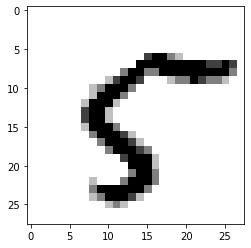

LABEL: 5


In [ ]:
#I search for a digit that is missclassified by logistic regression and correctly classified by the best SVM
#in the test set beacuse both of them have a training error of 0
y_test_predicted_lr=lr_cv.predict(X_test)
y_test_predicted_bestSVM=best_SVM.predict(X_test)
for i in range(0,len(y_test)):
    if y_test_predicted_lr[i]!=y_test[i] :
        if y_test_predicted_bestSVM[i]==y_test[i] :
            print("Logistic Regression label missclassified: ",y_test_predicted_lr[i],"\nSVM label correctly classified: ",y_test_predicted_bestSVM[i])
            print("Index: ",i)
            plot_digit(X_test,y_test,i)
            break

## More data
Now let's do the same but using 1000 data points for training. 

## Exercize 5
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above.

Labels and frequencies in training dataset: 
label:  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9'] 
counter:  [102 127  86  90  87  99 110 105  89 105]

RESULTS FOR LINEAR KERNEL
Best parameters set found:  {'C': 1}
Best estimator set found:  SVC(C=1, kernel='linear')
Score with best parameters:  0.89
All scores on the grid:
mean_fit_time        [0.23023152 0.23210201 0.22938066]
std_fit_time         [0.00280248 0.00585703 0.00262303]
mean_score_time      [0.06800437 0.06750708 0.06808434]
std_score_time       [0.00126335 0.00289217 0.00121113]
param_C              [1 10 100]
params               [{'C': 1}, {'C': 10}, {'C': 100}]
split0_test_score    [0.86 0.86 0.86]
split1_test_score    [0.915 0.915 0.915]
split2_test_score    [0.875 0.875 0.875]
split3_test_score    [0.92 0.92 0.92]
split4_test_score    [0.88 0.88 0.88]
mean_test_score      [0.89 0.89 0.89]
std_test_score       [0.02345208 0.02345208 0.02345208]
rank_test_score      [1 1 1]


RESULTS FOR POLY DEGREE=2 KERNEL
Best paramet

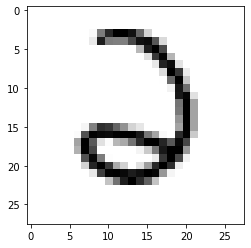

LABEL: 2


In [ ]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
#I use the same permutation to compare the results in abetter way
m_training = 1000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]
print("Labels and frequencies in training dataset: ")
label,counter=np.unique(y_train, return_counts = True)
print("label: ",label,"\ncounter: ",counter)    


#TO DO 1
# parameters for linear SVM
parameters = {'C': [1, 10, 100]}
#run linear SVM
linear_SVM = SVC(kernel='linear')
#find best model uusing 5-fold CV and train it using all the training data
clf_lin = GridSearchCV(linear_SVM, parameters,cv=5)
clf_lin.fit(X_train, y_train)

print ('\nRESULTS FOR LINEAR KERNEL')
print("Best parameters set found: ",clf_lin.best_params_)
print("Best estimator set found: ",clf_lin.best_estimator_)
print("Score with best parameters: ",clf_lin.best_score_)
print("All scores on the grid:")
print_dicitonary(clf_lin.cv_results_)


# parameters for poly with degree 2 kernel
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}
#run SVM with poly of degree 2 kernel
poly2_SVM = SVC(kernel='poly',degree=2)
#DO THE SAME AS ABOVE FOR POLYNOMIAL KERNEL WITH DEGREE=2
clf_pol = GridSearchCV(poly2_SVM, parameters,cv=5)
clf_pol.fit(X_train, y_train)

print ('\n\nRESULTS FOR POLY DEGREE=2 KERNEL')
print("Best parameters set found: ",clf_pol.best_params_)
print("Best estimator set found: ",clf_pol.best_estimator_)
print("Score with best parameters: ",clf_pol.best_score_)
print("All scores on the grid:")
print_dicitonary(clf_pol.cv_results_)


# parameters for rbf SVM
parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}
#run SVM with rbf kernel
rbf_SVM = SVC(kernel='rbf')
#DO THE SAME AS ABOVE FOR RBF KERNEL
clf_ker = GridSearchCV(rbf_SVM, parameters,cv=5)
clf_ker.fit(X_train, y_train)

print ('\n\nRESULTS FOR rbf KERNEL:')
print("Best parameters set found: ",clf_ker.best_params_)
print("Best estimator set found: ",clf_ker.best_estimator_)
print("Score with best parameters: ",clf_ker.best_score_)
print("All scores on the grid:")
print_dicitonary(clf_ker.cv_results_)


#TO DO 2
#get training and test error for the best SVM model from CV
best_SVM = SVC(C=10,kernel='rbf',gamma=0.01)
# fit the model on the entire training set
best_SVM.fit(X_train, y_train)
#get the training and test error
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)


lr = linear_model.LogisticRegression(max_iter=1000)
# fit the model on the training data
lr.fit(X_train, y_train)
#compute training and test error for model above
training_error = 1. - lr.score(X_train,y_train)
test_error =1. -  lr.score(X_test,y_test)
print ("logistic regression training error: %f" % training_error)
print ("logistic regression test error: %f" % test_error)

#logistic regression with 5-fold CV: you can use use linear_model.LogisticRegressionCV
# use 5-fold CV to find the best choice of the parameter, than train
# the model on the entire training set
lr_cv = linear_model.LogisticRegressionCV(cv=5,max_iter=1000)
lr_cv.fit(X_train, y_train)
training_error_cv = 1. - lr_cv.score(X_train,y_train)
test_error_cv = 1. - lr_cv.score(X_test,y_test)
print ("logistic regression CV training error: %f" % training_error_cv)
print ("logistic regression CV test error: %f" % test_error_cv)

#TO DO 4
y_test_predicted_lr=lr_cv.predict(X_test)
y_test_predicted_bestSVM=best_SVM.predict(X_test)
for i in range(0,len(y_test)):
    if y_test_predicted_lr[i]!=y_test[i] :
        if y_test_predicted_bestSVM[i]==y_test[i] :
            print("Logistic Regression label missclassified: ",y_test_predicted_lr[i],"\nSVM label correctly classified: ",y_test_predicted_bestSVM[i])
            print("Index: ",i)
            plot_digit(X_test,y_test,i)
            break

As we can see from the results they have a Training error of 0 again. SVM performs better than the Logistic Regression.
Furthermore using more samples on training set they performs better than before on test set.
As before the best SVM is the SVM with rbf kernel with the same best parameters as above.

1. best SVW test error:     0.07856
2. logistic regression CV:  0.13608